# Atividade - Séries temporais

Utilizando o conjunto de dados `dados_clima.csv`:

* Plote duas características que variem ao longo do tempo.
* Monte um Agrupamento por dia e um agrupamento por mês.
* Faça uma análise estatística por meio de gráficos comparando a precipitacao ao longo do tempo para cada estado do dataset.

# Bibliotecas

In [777]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.context('bmh')

# Carregamento e visualização inicial dos dados

In [778]:
clima = pd.read_csv('dados_clima.csv')
print('Dataset com {} linhas e {} colunas.'.format(clima.shape[0], clima.shape[1]))

Dataset com 214166 linhas e 13 colunas.


In [779]:
clima.head()

,Estacao,altitude,cidade,data,estado,fonte,insolacao,latitude,longitude,precipitacao,tmax,tmin,ur
0,83552,130.0,corumba,01/01/2000,ms,inpe,9.8,-19.01,-57.65,NaN,32.9,NaN,64.50
1,83552,130.0,corumba,02/01/2000,ms,inpe,12.4,-19.01,-57.65,1.2,33.6,24.4,59.25
2,83552,130.0,corumba,03/01/2000,ms,inpe,12.3,-19.01,-57.65,0.0,35.6,21.5,60.75
3,83552,130.0,corumba,04/01/2000,ms,inpe,12.4,-19.01,-57.65,0.0,37.2,23.8,58.75
4,83552,130.0,corumba,05/01/2000,ms,inpe,12.2,-19.01,-57.65,0.0,37.4,23.7,57.25


In [780]:
clima.tail()

,Estacao,altitude,cidade,data,estado,fonte,insolacao,latitude,longitude,precipitacao,tmax,tmin,ur
214161,2653012,650.0,franciscobeltrao,27/12/2019,pr,iapar,8.5,-26.05,-53.04,0.0,33.4,19.0,60.9
214162,2653012,650.0,franciscobeltrao,28/12/2019,pr,iapar,9.0,-26.05,-53.04,0.0,32.8,21.6,59.5
214163,2653012,650.0,franciscobeltrao,29/12/2019,pr,iapar,10.3,-26.05,-53.04,0.0,35.2,18.6,57.1
214164,2653012,650.0,franciscobeltrao,30/12/2019,pr,iapar,6.8,-26.05,-53.04,0.0,34.2,21.0,66.4
214165,2653012,650.0,franciscobeltrao,31/12/2019,pr,iapar,3.9,-26.05,-53.04,0.0,33.2,19.4,73.0


In [781]:
print('Quantidade de estados: {}.'.format(clima.estado.nunique()))
print('Quantidade de cidades: {}.'.format(clima.cidade.nunique()))
print('Quantidade de estações: {}.'.format(clima.Estacao.nunique()))

Quantidade de estados: 3.
Quantidade de cidades: 31.
Quantidade de estações: 32.


In [782]:
print('Estados no dataset:')
print(clima.estado.unique())

Estados no dataset:
['ms' 'pr' 'sp']


In [783]:
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214166 entries, 0 to 214165
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Estacao       214166 non-null  int64  
 1   altitude      214166 non-null  float64
 2   cidade        214166 non-null  object 
 3   data          214166 non-null  object 
 4   estado        214166 non-null  object 
 5   fonte         214166 non-null  object 
 6   insolacao     211951 non-null  float64
 7   latitude      214166 non-null  float64
 8   longitude     214166 non-null  float64
 9   precipitacao  214165 non-null  float64
 10  tmax          214166 non-null  float64
 11  tmin          214165 non-null  float64
 12  ur            214166 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 21.2+ MB


In [784]:
clima.describe()

,Estacao,altitude,insolacao,latitude,longitude,precipitacao,tmax,tmin,ur
count,2.141660e+05,214166.000000,211951.000000,214166.000000,214166.000000,214165.000000,214166.000000,214165.000000,214166.000000
mean,6.510622e+05,651.617482,5.745453,-23.087489,-50.541296,4.300004,27.554835,16.245991,73.610399
std,1.012333e+06,310.690551,3.922946,1.901325,2.886013,11.257463,5.011632,4.774662,14.376536
min,8.307500e+04,4.500000,0.000000,-26.050000,-57.650000,0.000000,5.000000,-6.000000,0.000000
25%,8.370200e+04,480.000000,1.600000,-25.000000,-52.260000,0.000000,24.400000,13.500000,64.900000
50%,8.378100e+04,617.390000,6.600000,-23.220000,-50.630000,0.000000,28.100000,17.000000,75.250000
75%,8.385100e+04,836.960000,9.300000,-21.960000,-48.510000,2.000000,31.200000,19.700000,84.500000
max,2.653012e+06,1642.000000,14.200000,-18.980000,-45.550000,295.800000,42.200000,29.200000,100.000000


In [785]:
clima.isnull().sum()

Estacao            0
altitude           0
cidade             0
data               0
estado             0
fonte              0
insolacao       2215
latitude           0
longitude          0
precipitacao       1
tmax               0
tmin               1
ur                 0
dtype: int64

# Dados nulos

Temos alguns dados nulos no dataset. A coluna que mais contém nulos é a coluna `insolação`, enquanto as colunas `tmin` e `precipitacao` contém um valor nulo cada.

Vamos verificar a distribuição dos dados de insolação.

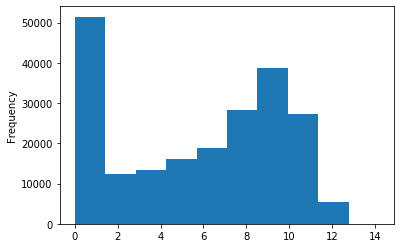

In [786]:
clima.insolacao.plot(kind='hist')

In [787]:
clima[clima.insolacao.isnull()].cidade.unique()

array(['londrina', 'paranavai', 'umuarama', 'fernandespinheiro',
       'guarapuava', 'franciscobeltrao'], dtype=object)

In [788]:
null_cities = clima[clima.insolacao.isnull()].cidade.unique().tolist()

In [789]:
print('Porcentagem de registros nulos de insolação.')
for city in null_cities:
    nulos = clima[(clima.cidade==city) & (clima.insolacao.isnull())].shape[0]
    total = clima[clima.cidade==city].shape[0]
    print('Cidade: {}, nulos: {:.2f}%'.format(city, (nulos/total)*100))

Porcentagem de registros nulos de insolação.
Cidade: londrina, nulos: 1.04%
Cidade: paranavai, nulos: 1.65%
Cidade: umuarama, nulos: 11.19%
Cidade: fernandespinheiro, nulos: 10.11%
Cidade: guarapuava, nulos: 0.85%
Cidade: franciscobeltrao, nulos: 4.33%


Observa-se na contagem acima que a ciade de Umuarama tem grande porcentagem de nulos, além da cidade de Fernandes Pinheiro.

Por enquanto, vamos fazer o seguinte: nas grandezas onde há valores nulos, vamos substituir pela mediana.

In [790]:
clima.insolacao.fillna(clima.insolacao.median(), inplace=True)
clima.precipitacao.fillna(clima.precipitacao.median(), inplace=True)
clima.tmin.fillna(clima.tmin.median(), inplace=True)

In [791]:
clima.isnull().sum()

Estacao         0
altitude        0
cidade          0
data            0
estado          0
fonte           0
insolacao       0
latitude        0
longitude       0
precipitacao    0
tmax            0
tmin            0
ur              0
dtype: int64

# Organizando as datas

Nesta parte vamos converter as datas para `timestamps` do Pandas e criar algumas colunas com features extraídas das datas.

In [792]:
clima.loc[:, 'data'] = pd.to_datetime(clima.data, format="%d/%m/%Y")

In [793]:
type(clima.data.loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [794]:
print('Testando...')
print('Data: {}'.format(clima.data.dt.date.loc[80]))
print('Dia da semana: {}'.format(clima.data.dt.dayofweek.loc[80]))
print('Dia do mês: {}'.format(clima.data.dt.day.loc[80]))
print('Dia do ano: {}'.format(clima.data.dt.dayofyear.loc[80]))
print('Semana do ano: {}'.format(clima.data.dt.weekofyear.loc[80]))
print('Mês: {}'.format(clima.data.dt.month.loc[80]))
print('Ano: {}'.format(clima.data.dt.year.loc[80]))

Testando...
Data: 2000-03-21
Dia da semana: 1
Dia do mês: 21
Dia do ano: 81
Semana do ano: 12
Mês: 3
Ano: 2000


In [795]:
print('Data do primeiro registro:')
print(clima.data.dt.date.sort_values().iloc[0])
print('Data do último registro:')
print(clima.data.dt.date.sort_values().iloc[-1])
print('Intervalo de dias no dataset:')
intervalo = clima.data.dt.date.sort_values().iloc[-1] - clima.data.dt.date.sort_values().iloc[0]
print(intervalo)

Data do primeiro registro:
2000-01-01
Data do último registro:
2020-03-03
Intervalo de dias no dataset:
7367 days, 0:00:00


Para facilitar a análise, podemos adicionar algumas colunas em nosso dataframe com dias do ano, dia do mês, semana do ano, mês e ano. Essas colunas podem também entrar como features no caso da criação de um modelo preditivo.

In [796]:
clima['dia_da_semana'] = clima.data.dt.dayofweek
clima['dia_da_mês'] = clima.data.dt.day
clima['dia_do_ano'] = clima.data.dt.dayofyear
clima['mes'] = clima.data.dt.month
clima['ano'] = clima.data.dt.year
# clima['data'] = clima.data.dt.date

In [797]:
clima.head()

,Estacao,altitude,cidade,data,estado,fonte,insolacao,latitude,longitude,precipitacao,tmax,tmin,ur,dia_da_semana,dia_da_mês,dia_do_ano,mes,ano
0,83552,130.0,corumba,2000-01-01,ms,inpe,9.8,-19.01,-57.65,0.0,32.9,17.0,64.50,5,1,1,1,2000
1,83552,130.0,corumba,2000-01-02,ms,inpe,12.4,-19.01,-57.65,1.2,33.6,24.4,59.25,6,2,2,1,2000
2,83552,130.0,corumba,2000-01-03,ms,inpe,12.3,-19.01,-57.65,0.0,35.6,21.5,60.75,0,3,3,1,2000
3,83552,130.0,corumba,2000-01-04,ms,inpe,12.4,-19.01,-57.65,0.0,37.2,23.8,58.75,1,4,4,1,2000
4,83552,130.0,corumba,2000-01-05,ms,inpe,12.2,-19.01,-57.65,0.0,37.4,23.7,57.25,2,5,5,1,2000


# Visualização de séries temporais

Vamos selecionar as seguintes variáveis para visualizar:

* Variáveis de temperatura (`tmax` e `tmin`);
* Variável de precipitação (`precipitacao`).

### Plots - Variáveis de temperatura

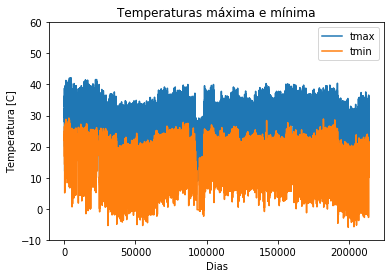

In [798]:
fig, ax = plt.subplots()
clima.tmax.plot(ax=ax)
clima.tmin.plot(ax=ax)
ax.set_title('Temperaturas máxima e mínima')
ax.set_ylabel('Temperatura [C]')
ax.set_xlabel('Dias')
ax.legend(loc='upper right')
plt.yticks(np.arange(-10, 70, step=10))
plt.show()

Entendendo o gráfico acima e os gráficos que serão plotados a seguir:

* O dataframe está ordenado por cidades. Ou seja, tem a série completa de cada cidade, uma acima da outra. No plot acima uma série está sendo plotada em seguida da outra, são diversas séries conectadas, totalizando cerca de 200000 dias, que é o tamanho total do dataframe. Para plotar séries especificas, temos que agrupar ou selecionar os trechos que quremos.
* Ao agrupar por média mensal, por exemplo, a média será equivalente a média mensal de todas as cidades presentes no dataframe. Para pegar de uma cidade ou estado específico, deve ser especificado no momento do agrupamento. 

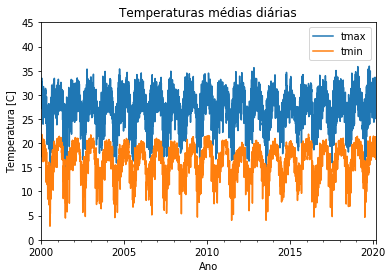

In [799]:
# Média por dia
fig, ax = plt.subplots()
clima.groupby('data')['tmax'].mean().plot(ax=ax)
clima.groupby('data')['tmin'].mean().plot(ax=ax)
ax.set_title('Temperaturas médias diárias')
ax.set_ylabel('Temperatura [C]')
ax.set_xlabel('Ano')
ax.set_yticks(np.arange(0, 50, step=5))
ax.legend()
plt.show()

Também podemos utilizar o método `resample` do Pandas, para isso a coluna de index deve ser a coluna das datas.

In [800]:
clima_teste = clima.copy()
clima_teste.index = clima_teste.data
clima_teste.head()

,Estacao,altitude,cidade,data,estado,fonte,insolacao,latitude,longitude,precipitacao,tmax,tmin,ur,dia_da_semana,dia_da_mês,dia_do_ano,mes,ano
data,,,,,,,,,,,,,,,,,,
2000-01-01,83552,130.0,corumba,2000-01-01,ms,inpe,9.8,-19.01,-57.65,0.0,32.9,17.0,64.50,5,1,1,1,2000
2000-01-02,83552,130.0,corumba,2000-01-02,ms,inpe,12.4,-19.01,-57.65,1.2,33.6,24.4,59.25,6,2,2,1,2000
2000-01-03,83552,130.0,corumba,2000-01-03,ms,inpe,12.3,-19.01,-57.65,0.0,35.6,21.5,60.75,0,3,3,1,2000
2000-01-04,83552,130.0,corumba,2000-01-04,ms,inpe,12.4,-19.01,-57.65,0.0,37.2,23.8,58.75,1,4,4,1,2000
2000-01-05,83552,130.0,corumba,2000-01-05,ms,inpe,12.2,-19.01,-57.65,0.0,37.4,23.7,57.25,2,5,5,1,2000


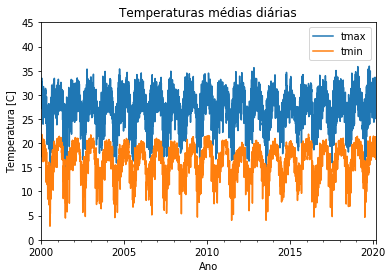

In [801]:
clima_teste[['tmax', 'tmin']].resample('D').mean().plot()
plt.yticks(np.arange(0, 50, step=5))
plt.title('Temperaturas médias diárias')
plt.ylabel('Temperatura [C]')
plt.xlabel('Ano')
plt.show()

Da mesma forma, podemos fazer os plots das médias para mês e ano.

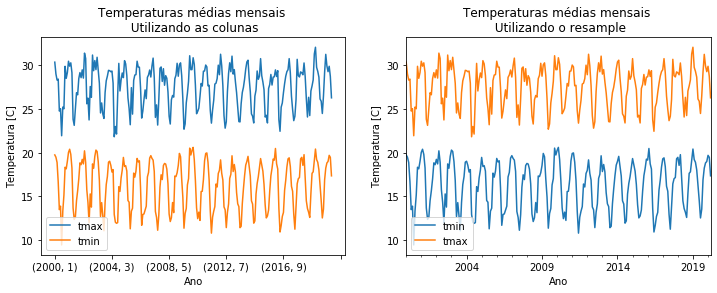

In [802]:
# Média por mês
fig, ax = plt.subplots(1, 2, figsize=(12,4))
clima.groupby(['ano', 'mes'])['tmax'].mean().plot(ax=ax[0])
clima.groupby(['ano', 'mes'])['tmin'].mean().plot(ax=ax[0])
ax[0].set_title('Temperaturas médias mensais \n Utilizando as colunas')
ax[0].set_ylabel('Temperatura [C]')
ax[0].set_xlabel('Ano')
ax[0].legend()
clima_teste[['tmin','tmax']].resample('M').mean().plot(ax=ax[1])
ax[1].set_title('Temperaturas médias mensais \n Utilizando o resample')
ax[1].set_ylabel('Temperatura [C]')
ax[1].set_xlabel('Ano')
# ax[1].set_yticks(np.arange(0, 50, step=5))
ax[1].legend()
plt.show()

In [803]:
clima.ano.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

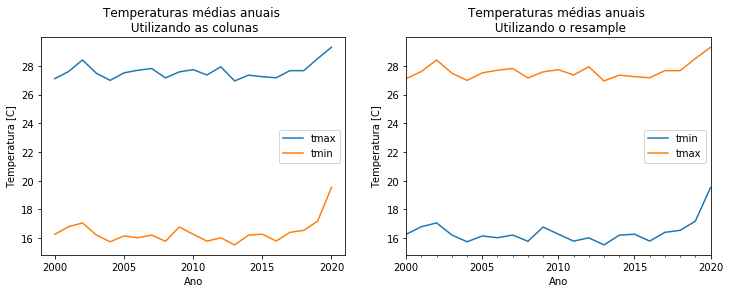

In [804]:
# Média por ano
fig, ax = plt.subplots(1, 2, figsize=(12,4))
clima.groupby(['ano'])['tmax'].mean().plot(ax=ax[0])
clima.groupby(['ano'])['tmin'].mean().plot(ax=ax[0])
ax[0].set_title('Temperaturas médias anuais \n Utilizando as colunas')
ax[0].set_ylabel('Temperatura [C]')
ax[0].set_xlabel('Ano')
ax[0].set_xticks(np.arange(2000, 2021, step=5))
#ax[0].set_yticks(np.arange(0, 50, step=5))
ax[0].legend()
clima_teste[['tmin','tmax']].resample('Y').mean().plot(ax=ax[1])
ax[1].set_title('Temperaturas médias anuais \n Utilizando o resample')
ax[1].set_ylabel('Temperatura [C]')
ax[1].set_xlabel('Ano')
# ax[1].set_yticks(np.arange(0, 50, step=5))
ax[1].legend()
plt.show()

Nos testes acimas podemos verificar como o `resample` auxilia nos plots para séries temporais. Sem o resample, tivemos que criar novas colunas e fazer agrupamentos.

### Plots - Precipitação

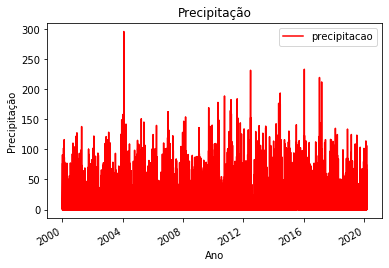

In [805]:
# Série temporal completa
fig, ax = plt.subplots()
clima_teste['precipitacao'].plot(ax=ax, style='r')
ax.set_title('Precipitação')
ax.set_ylabel('Precipitação')
ax.set_xlabel('Ano')
ax.legend(loc='upper right')
plt.show()

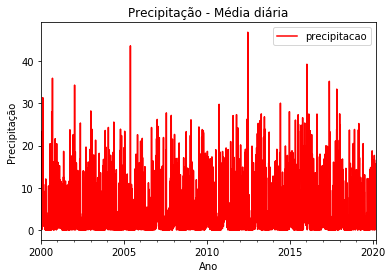

In [806]:
# Média diária
fig, ax = plt.subplots()
clima_teste['precipitacao'].resample('D').mean().plot(ax=ax, style='r')
ax.set_title('Precipitação - Média diária')
ax.set_ylabel('Precipitação')
ax.set_xlabel('Ano')
ax.legend(loc='upper right')
plt.show()

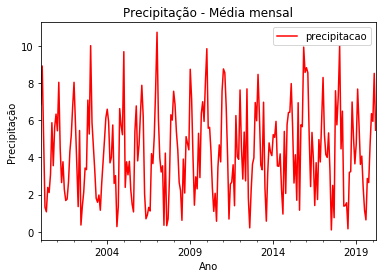

In [807]:
# Média mensal
fig, ax = plt.subplots()
clima_teste['precipitacao'].resample('M').mean().plot(ax=ax, style='r')
ax.set_title('Precipitação - Média mensal')
ax.set_ylabel('Precipitação')
ax.set_xlabel('Ano')
ax.legend(loc='upper right')
plt.show()

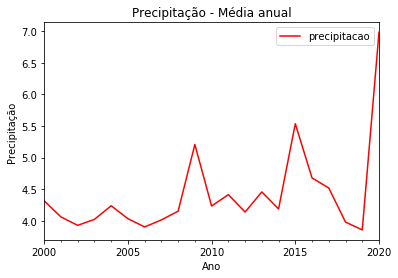

In [808]:
# Média anual
fig, ax = plt.subplots()
clima_teste['precipitacao'].resample('Y').mean().plot(ax=ax, style='r')
ax.set_title('Precipitação - Média anual')
ax.set_ylabel('Precipitação')
ax.set_xlabel('Ano')
ax.legend(loc='upper right')
plt.show()

In [809]:
clima_teste.groupby('estado').mean()

,Estacao,altitude,insolacao,latitude,longitude,precipitacao,tmax,tmin,ur,dia_da_semana,dia_da_mês,dia_do_ano,mes,ano
estado,,,,,,,,,,,,,,
ms,8.360131e+04,309.556083,6.687672,-20.424266,-54.822326,3.703570,31.114821,18.853613,71.886611,2.994679,15.725397,180.644856,6.441138,2008.273749
pr,1.207536e+06,658.392492,5.927102,-24.473452,-51.064674,4.683947,26.437902,15.635738,75.682283,2.989392,15.728398,181.967972,6.484708,2009.421632
sp,8.367267e+04,779.680357,5.131238,-22.177689,-48.068685,3.990992,27.718704,16.068706,71.341214,2.963041,15.715782,182.313399,6.496303,2008.580169


# Análise estatística da precipitação em diferentes estados

Temos 3 estados no dataset.

Podemos comparar a precipitação considerando a precipitação diária, soma mensal e anual. Vamos considerar a soma para os gráficos de precipitação, assim temos a precipitação total no estado para determinado mês ou ano.

Além disso, podemos comparar a média móvel considerando diferentes janelas. Vamos considerar aqui janelas de 30, 60 e 90 dias.

Vamos excluir o ano de 2020 do dataset, pois temos somente dados até o mês de março.

### Precipitação diária

In [810]:
drop_idx = clima_teste[clima_teste.data.dt.year==2020].index
clima_teste = clima_teste.drop(drop_idx)

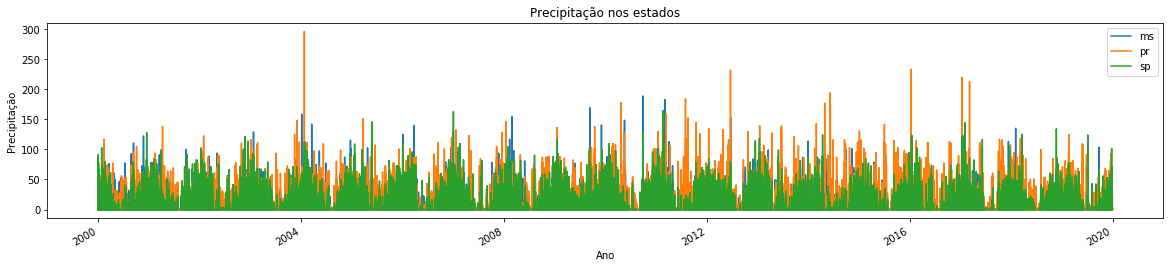

In [811]:
fig, ax = plt.subplots(figsize=(20,4))
clima_teste.groupby('estado')['precipitacao'].plot()
plt.title('Precipitação nos estados')
plt.xlabel('Ano')
plt.ylabel('Precipitação')
plt.legend(loc='upper right')

Neste gráfico nota-se que as chuvas no paraná e São Paulo tem, aparentemente, médias maiores de precipitação. Porém, a visualização é um pouco difícil devido a grande quantidade de dados em um espaço pequeno.

Podemos fazer plots da precipitação diária, porém com intervalos menores. Vamos plotar agora os dados para cada ano.

### Precipitação mensal

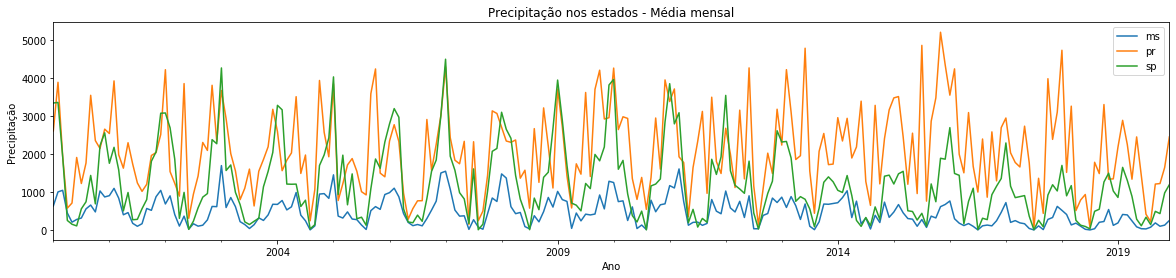

In [812]:
grouped = clima_teste.groupby('estado').resample('M').sum()
fig, ax = plt.subplots(figsize=(20,4))
grouped.loc['ms','precipitacao'].plot()
grouped.loc['pr','precipitacao'].plot()
grouped.loc['sp','precipitacao'].plot()
plt.legend(['ms', 'pr', 'sp'])
plt.title('Precipitação nos estados - Média mensal')
plt.xlabel('Ano')
plt.ylabel('Precipitação')
plt.legend(['ms', 'pr', 'sp'], loc='upper right')
plt.show()

Neste gráfico fica mais claro: a precipitação mensal no Paraná é a maior, seguida dos níveis de precipitação em São Paulo.

### Precipitação anual

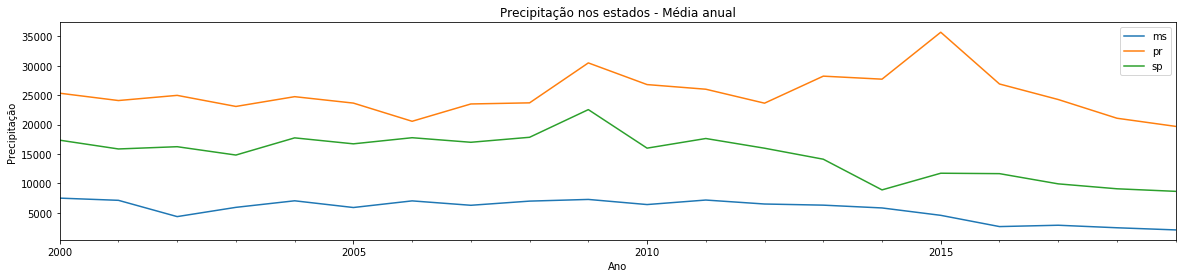

In [813]:
grouped = clima_teste.groupby('estado').resample('Y').sum()
fig, ax = plt.subplots(figsize=(20,4))
grouped.loc['ms','precipitacao'].plot()
grouped.loc['pr','precipitacao'].plot()
grouped.loc['sp','precipitacao'].plot()
plt.legend(['ms', 'pr', 'sp'])
plt.title('Precipitação nos estados - Média anual')
plt.xlabel('Ano')
plt.ylabel('Precipitação')
plt.legend(['ms', 'pr', 'sp'], loc='upper right')

# Médias móveis

Vamos observar as médias móveis para janelas de 30, 90, 180, 360 e 720 dias.

In [814]:
clima['rolling_30'] = clima.groupby('estado')['precipitacao'].apply(lambda x: x.rolling(30).sum())
clima['rolling_90'] = clima.groupby('estado')['precipitacao'].apply(lambda x: x.rolling(90).sum())
clima['rolling_180'] = clima.groupby('estado')['precipitacao'].apply(lambda x: x.rolling(180).sum())
clima['rolling_360'] = clima.groupby('estado')['precipitacao'].apply(lambda x: x.rolling(360).sum())
clima['rolling_720'] = clima.groupby('estado')['precipitacao'].apply(lambda x: x.rolling(720).sum())

In [817]:
clima_reind = clima.copy()
clima_reind.index = clima_reind.data

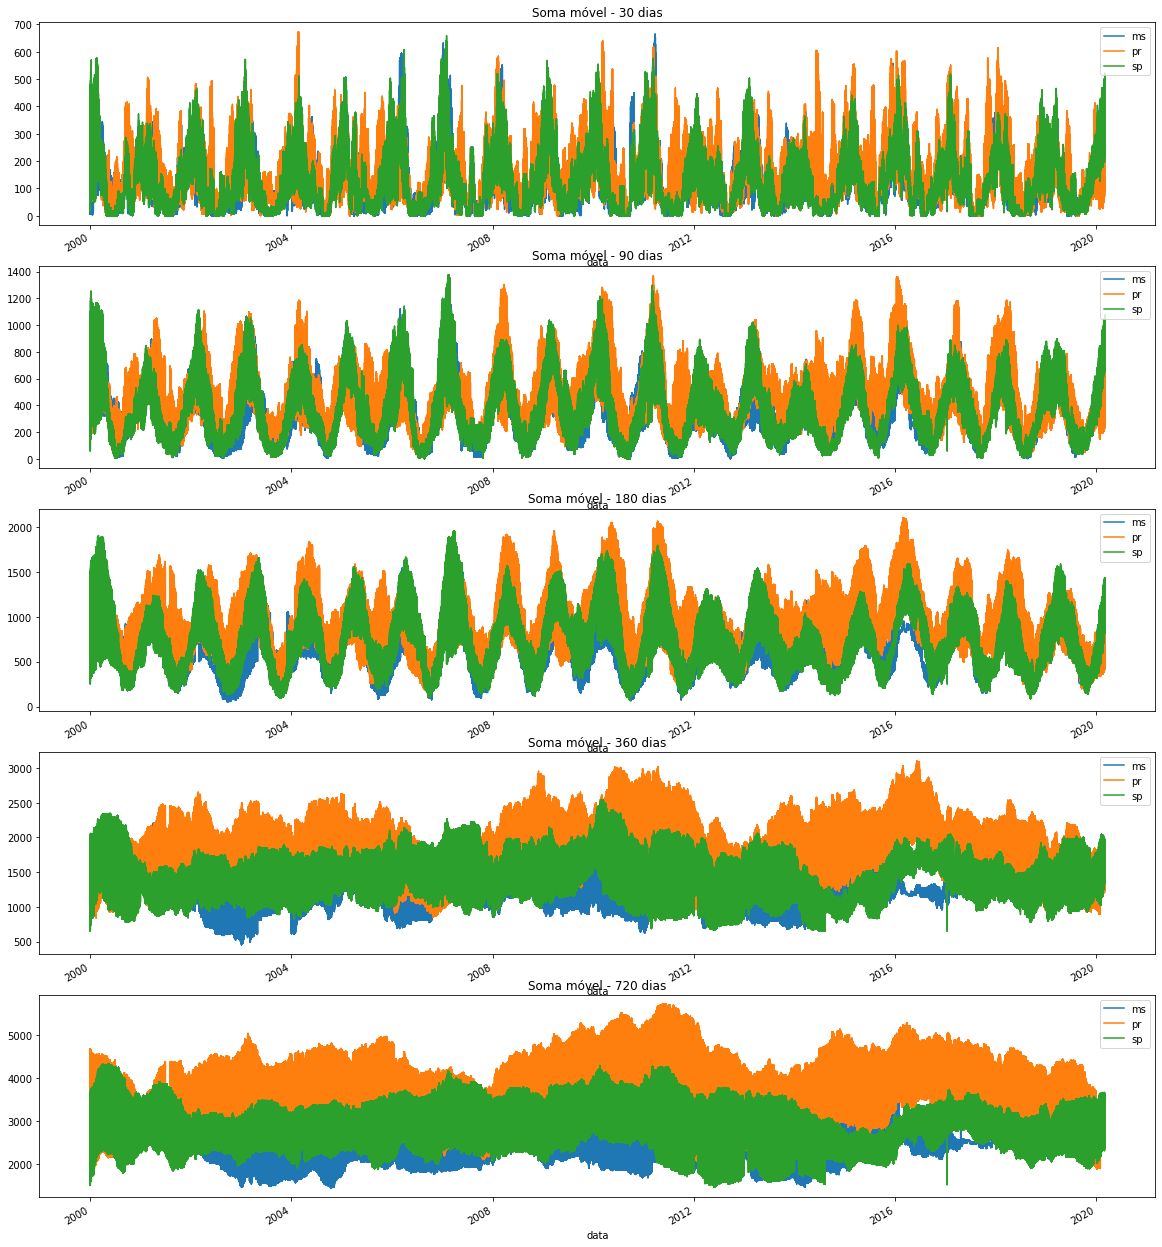

In [827]:
fig, axs = plt.subplots(5, 1, figsize=(20, 24))
clima_reind.groupby('estado').rolling_30.plot(ax=axs[0])
axs[0].legend(loc='upper right')
axs[0].set_title('Soma móvel - 30 dias')
clima_reind.groupby('estado').rolling_90.plot(ax=axs[1])
axs[1].legend(loc='upper right')
axs[1].set_title('Soma móvel - 90 dias')
clima_reind.groupby('estado').rolling_180.plot(ax=axs[2])
axs[2].legend(loc='upper right')
axs[2].set_title('Soma móvel - 180 dias')
clima_reind.groupby('estado').rolling_360.plot(ax=axs[3])
axs[3].legend(loc='upper right')
axs[3].set_title('Soma móvel - 360 dias')
clima_reind.groupby('estado').rolling_720.plot(ax=axs[4])
axs[4].legend(loc='upper right')
axs[4].set_title('Soma móvel - 720 dias')
plt.show()

In [828]:
import gc
gc.collect()

14301